In [1]:
import pandas as pd
import numpy as np


# NOW IMPORTING DATA

In [2]:
ts = pd.read_csv(r"C:\Users\HP\Desktop\PMFHIS\python\REgression insights\tips.csv")
ts

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6
...,...,...,...,...,...,...,...
739,3164.27,645.28,Male,No,Sat,Dinner,3
740,2962.62,218.00,Female,Yes,Sat,Dinner,2
741,2471.03,218.00,Male,Yes,Sat,Dinner,2
742,1942.38,190.75,Male,No,Sat,Dinner,2


# THE DATA CLEANING PROCESS

In [10]:
ts.tail()

,total_bill,tip,gender,smoker,day,time,size
739,3164.27,645.28,Male,No,Sat,Dinner,3
740,2962.62,218.00,Female,Yes,Sat,Dinner,2
741,2471.03,218.00,Male,Yes,Sat,Dinner,2
742,1942.38,190.75,Male,No,Sat,Dinner,2
743,2047.02,327.00,Female,No,Thur,Dinner,2


In [11]:
ts.describe()

,total_bill,tip,size
count,744.000000,744.000000,744.000000
mean,2165.006640,325.948091,3.180108
std,954.248806,148.778225,1.532890
min,44.690000,0.000000,1.000000
25%,1499.022500,218.000000,2.000000
50%,2102.610000,320.460000,3.000000
75%,2743.802500,415.562500,4.000000
max,5538.290000,1090.000000,6.000000


In [12]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  744 non-null    float64
 1   tip         744 non-null    float64
 2   gender      744 non-null    object 
 3   smoker      744 non-null    object 
 4   day         744 non-null    object 
 5   time        744 non-null    object 
 6   size        744 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 40.8+ KB


In [13]:
ts.columns

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')

# REMOVE IRRELEVANT DATA

In [3]:
ts.isnull().sum()

total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

# SINCE THERE IS NO MISSING COLUMN ON THE DATA SET AND WE DONT NEED TO DROPANY DATA SINCE ALL THE HEADER ARE RELEVANT

In [4]:
ts.shape

(744, 7)

In [16]:
ts.head

<bound method NDFrame.head of      total_bill     tip  gender smoker   day    time  size
0       2125.50  360.79    Male     No  Thur   Lunch     1
1       2727.18  259.42  Female     No   Sun  Dinner     5
2       1066.02  274.68  Female    Yes  Thur  Dinner     4
3       3493.45  337.90  Female     No   Sun  Dinner     1
4       3470.56  567.89    Male    Yes   Sun   Lunch     6
..          ...     ...     ...    ...   ...     ...   ...
739     3164.27  645.28    Male     No   Sat  Dinner     3
740     2962.62  218.00  Female    Yes   Sat  Dinner     2
741     2471.03  218.00    Male    Yes   Sat  Dinner     2
742     1942.38  190.75    Male     No   Sat  Dinner     2
743     2047.02  327.00  Female     No  Thur  Dinner     2

[744 rows x 7 columns]>

In [5]:
#Label encoding
cat_features=["gender", "smoker", "day", 
             "time"]

for cat_feature in cat_features:
    ts[f"{cat_feature}_cat"] = ts[cat_feature].astype("category")
    ts[f"{cat_feature}_cat"] = ts[f"{cat_feature}_cat"].cat.codes

In [6]:
ts.head()

,total_bill,tip,gender,smoker,day,time,size,gender_cat,smoker_cat,day_cat,time_cat
0,2125.50,360.79,Male,No,Thur,Lunch,1,1,0,4,1
1,2727.18,259.42,Female,No,Sun,Dinner,5,0,0,3,0
2,1066.02,274.68,Female,Yes,Thur,Dinner,4,0,1,4,0
3,3493.45,337.90,Female,No,Sun,Dinner,1,0,0,3,0
4,3470.56,567.89,Male,Yes,Sun,Lunch,6,1,1,3,1


In [7]:
ts.drop(["gender", "smoker", "day","time"], axis=1, inplace=True)
ts.head()

,total_bill,tip,size,gender_cat,smoker_cat,day_cat,time_cat
0,2125.50,360.79,1,1,0,4,1
1,2727.18,259.42,5,0,0,3,0
2,1066.02,274.68,4,0,1,4,0
3,3493.45,337.90,1,0,0,3,0
4,3470.56,567.89,6,1,1,3,1


# Perform data segmentation

In [8]:
y = ts["tip"]
X=ts.drop("tip", axis =1)

# IMPORTING sklearn TO TRAIN OUR DATA

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#csv-comma separated value

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, test_size=0.3)

# Load your data into the XGBOOST OR ON RANDOM FOREST OR LINEAR REGRESSION model i.e Train your model

LINEAR REGRESSION MODEL

In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

# Make predictions

In [22]:
reg.predict(X_test)

array([296.81861408, 367.14577516, 289.97769479, 356.777305  ,
       288.12243575, 313.50410553, 309.00180855, 356.0367664 ,
       401.10287137, 281.29419272, 318.96175873, 278.39006269,
       297.24099095, 266.81903841, 299.35760193, 364.08874819,
       244.05766404, 287.51022315, 332.67068627, 324.95913046,
       348.21287729, 325.14299664, 338.78572885, 355.22457266,
       314.51381385, 327.63539115, 349.26308686, 325.24072552,
       279.95959646, 316.44397923, 379.5468133 , 330.94561413,
       347.65053969, 313.52400396, 287.84430211, 294.18536679,
       341.62239113, 268.24683519, 254.78418859, 389.1788298 ,
       281.72474895, 314.08239313, 315.93392105, 377.11728015,
       358.45257312, 372.99725598, 307.2205954 , 307.41377513,
       325.23465122, 339.30924375, 316.51912071, 260.03589111,
       341.47563575, 267.09410853, 320.84366331, 339.15854586,
       374.8472834 , 362.26993117, 296.78792228, 347.99138052,
       354.10056019, 311.63620975, 310.10752382, 358.61

# Evaluate your model

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
# we are using mean_absolute_error because 
# this is a regression model

y_pred = reg.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
  #mae that is it is 7.61 away from the true value

MAE 116.03708907930854


In [25]:
submission = pd.DataFrame({"total_bill": X_test["total_bill"], "tip": y_pred})

submission.to_csv("machinelearningmodel.csv", index=False)

# DECISONTREE MODEL

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dt_reg =DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [28]:
y_pred =dt_reg.predict(X_test)
print("MAE", mean_absolute_error(y_pred,y_test))

MAE 166.65808035714286


# XGBOOSTREGRESSOR

In [29]:
!pip install xgboost

In [31]:
from xgboost import XGBRegressor

In [32]:
xg_reg = XGBRegressor()

In [33]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [34]:
y_pred =xg_reg.predict(X_test)
print("MAE", mean_absolute_error(y_pred,y_test))

MAE 136.70557755742752


# RANDOM FOREST REGRESSOR

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [42]:
rf_reg=RandomForestRegressor()

In [43]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

In [50]:
regr_obj = RandomForestRegressor(max_depth=3, random_state=0)
regr_obj.fit(X, y)

RandomForestRegressor(max_depth=3, random_state=0)

In [51]:
print(regr_obj.predict([[2, 10, 30, 0]]))

[79.74208428]


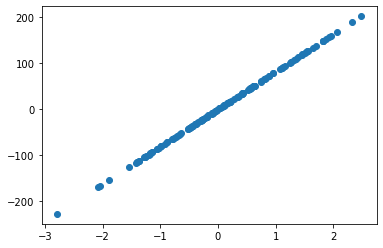

In [52]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
X_test, y_test = make_regression(n_samples=150, n_features=1, noise=0.2)
pyplot.scatter(X_test,y_test)
pyplot.show()